# Distribuzione binomiale

***By Alex Borio***

## Distribuzioni discrete

Le distribuzioni discrete sono fondamentali in statistica per modellare il comportamento di variabili aleatorie che possono assumere solo un numero finito o numerabile di valori distinti. Queste distribuzioni forniscono la probabilità associata a ciascun possibile risultato di una variabile casuale discreta.


Ecco un elenco delle distribuzioni discrete più comuni utilizzate in statistica:

<li>Distribuzione Bernoulli: Modella una variabile casuale che può assumere solo due valori distinti, generalmente indicati come successo o fallimento.</li>
<li>Distribuzione Binomiale: Descrive il numero di successi in una serie di tentativi indipendenti, ciascuno con una probabilità di successo costante.</li>
<li>Distribuzione di Poisson: Utilizzata per modellare il numero di eventi rari che si verificano in un dato intervallo di tempo o spazio.</li>
<li>Distribuzione Geometrica: Rappresenta il numero di tentativi necessari prima che si verifichi il primo successo in una sequenza di  tentativi indipendenti con una probabilità di successo costante.</li>

## Distribuzione binomiale

La Distribuzione Binomiale è una distribuzione di probabilità discreta utilizzata per calcolare la probabilità di ottenere un determinato <u>numero di successi su una certa quantità di ripetizioni dello stesso esperimento.</u>

Le 4 condizioni fondamentali per applicare questo tipo di distribuzione sono le seguenti:

<ul>

<li>I risultati possibili sono di successo o fallimento</li>
<li>I risultati delle prove precedenti non influenzano il risultato di un'altra prova</li>
<li>Il numero di prove è predeterminato</li>
<li>La probabilità di successo di ogni prova deve sempre essere p</li>
    
 </ul>

<u>I parametri utilizzati sono:</u>

**n**= il numero di prove 

**p**= probabilità di successo di ogni prova



<img src="https://chrispiech.github.io/probabilityForComputerScientists/img/chapters/binEquation2.png" alt="350" width="550" align="left"/>

## Esempi

### Esempio 1: Apertura di un ristorante

Un nuovo Ristorante in città ha una probabilità di sopravvivere del **20%** dopo il primo anno.

Se quest'anno hanno aperto **14** ristoranti, <u>qual è la probabilità che esattamente 4 ristoranti sopravvivano dopo il primo anno?</u>

**n**=14

**p**=0.20

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy.stats as stats

In [3]:
# The scipy.stats.binom contains all the methods required to generate and work 
# with a binomial distribution. The most frequently methods are: pmf(), cdf(), ppf()

# Istanziamo la nostra variabile casuale binomiale con parametri n=14 e p=0.2

X_rv = stats.binom(
                n = 14,
                p = 0.2,
)

In [4]:
# Once created we can use the pmf method of this object to calculate the exact probability: (Probability Mass Function)

probability = X_rv.pmf(4)
probability

0.17197049053184013

In [5]:
# Stessa cosa:

probability = stats.binom.pmf(k = 4,
                              n = 14,
                              p = 0.2)

probability

0.17197049053184013

In [6]:
# Let's visualize the PMF of the binomial random variable X:

n_restaurants = np.arange(0,14+1) 

n_restaurants_prob = X_rv.pmf(n_restaurants)

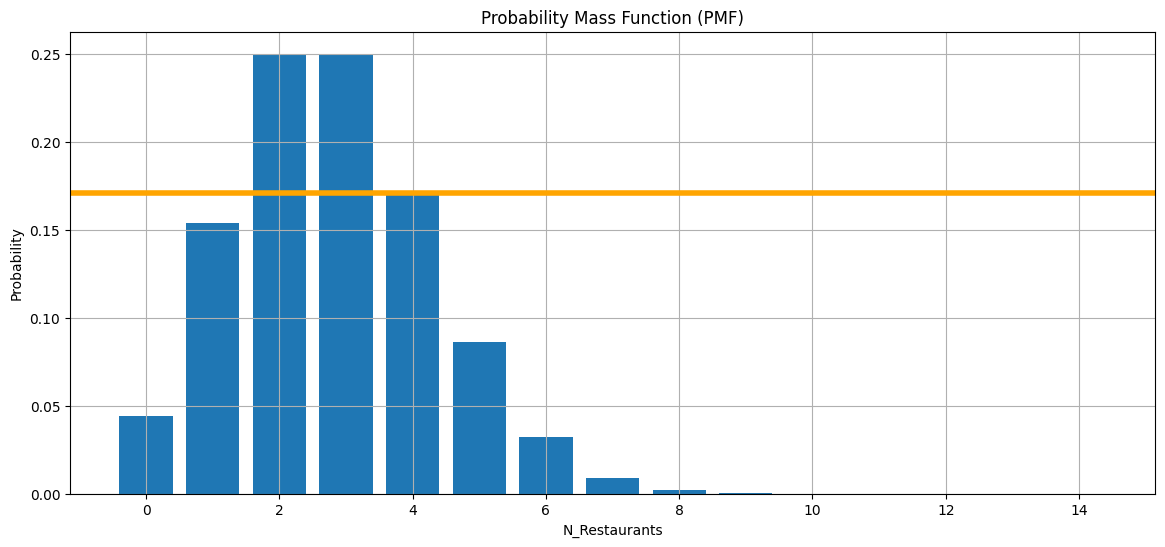

In [7]:
plt.figure(figsize=(14,6))

plt.axhline(y=0.171, color='orange', linestyle='-', linewidth=4)

plt.bar(n_restaurants, n_restaurants_prob)

plt.title('Probability Mass Function (PMF)')
plt.xlabel('N_Restaurants')
plt.ylabel('Probability')
plt.grid()
plt.show()

In [8]:
# Somma delle proba deve restituire 1:

sum(n_restaurants_prob)

1.0000000000000007

### Esempio 2: Gruppo sanguigno

Una coppia ha un **25%** di probabilità di avere un figlio con gruppo sanguigno 0.

<u>Qual'è la probabilità che 3 dei loro <strong>5 figli</strong> abbiano il gruppo 0?</u>

**n**=5

**p**=0.25

In [9]:
X_rv= stats.binom(
    n=5, 
    p=0.25 
      )

In [10]:
proba_3= X_rv.pmf(3)
proba_3

0.08789062499999994

In [11]:
n_children= np.arange(0,5+1) 

n_children_proba= X_rv.pmf(n_children)

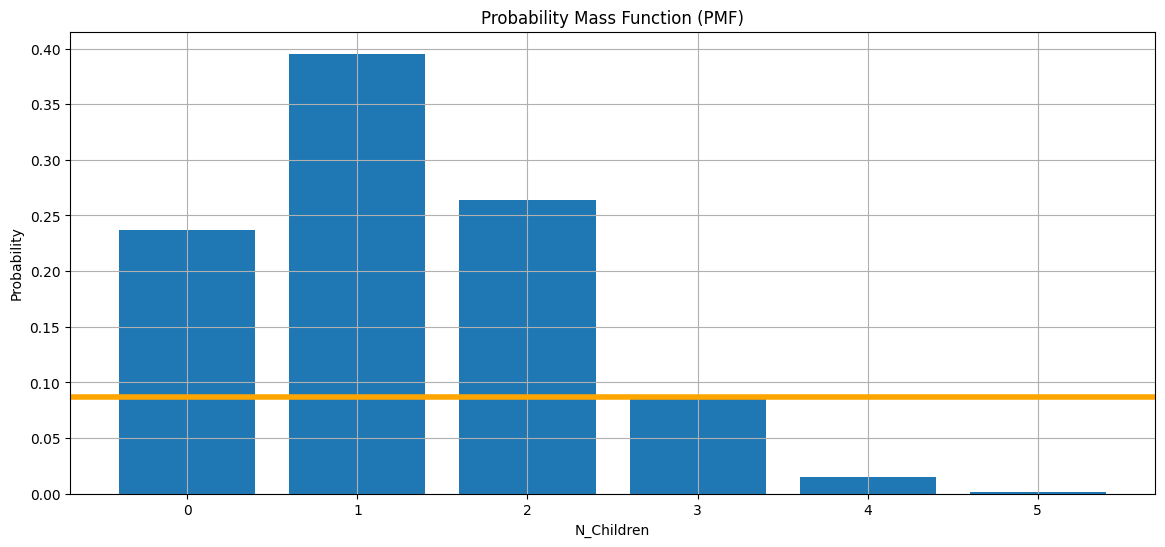

In [12]:
plt.figure(figsize=(14,6))

plt.axhline(y=0.087, color='orange', linestyle='-', linewidth=4)

plt.bar(n_children, n_children_proba)

plt.title('Probability Mass Function (PMF)')
plt.xlabel('N_Children')
plt.ylabel('Probability')
plt.grid()
plt.show()

Qual è la probabilità che ALMENO 3 dei loro  5 figli abbiano il gruppo 0?

##### P(X >= 3)


In [13]:
#Usando Pmf() #Probability Mass Function

at_least_3= X_rv.pmf(3) + X_rv.pmf(4) + X_rv.pmf(5)
at_least_3

0.10351562499999994

In [14]:
#Usando Cdf() -> Cumulative Distribution Function

at_least_3_cdf= 1 - X_rv.cdf(2) #praticamente 100% (1) - probabilità accumulata (CDF) da 2 incluso a 0.
at_least_3_cdf

0.103515625

### Esempio 3: Farmaco

I medici utilizzano la distribuzione binomiale per modellare la probabilità che un certo numero di pazienti manifesti effetti collaterali in seguito all'assunzione di nuovi farmaci.

Ad esempio, supponiamo che sia noto che il **5%** degli adulti che assumono un determinato farmaco sperimenta effetti collaterali negativi. Possiamo usare un calcolatore di distribuzione binomiale per trovare la probabilità che più di un certo numero di pazienti in un campione casuale di **100** sperimentino effetti collaterali negativi.

P(X > 5 pazienti manifestano effetti collaterali)?

P(X > 10 pazienti manifestano effetti collaterali)?

P(X > 15 pazienti sperimentano effetti collaterali)?

In [15]:
X_rv= stats.binom(
    n=100, 
    p=0.05 
      )

In [16]:
proba_g_5= 1 - X_rv.cdf(5)
proba_g_5

0.3840008720438586

In [17]:
proba_g_10= 1 - X_rv.cdf(10)
proba_g_10

0.011472410067484673

In [18]:
proba_g_15= 1 - X_rv.cdf(15)
proba_g_15 #0.0004

3.705407617760059e-05